In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import folium
import os
import webbrowser 
import seaborn as sns

In [5]:
# Load dataset from GitHub repo
url = r"https://github.com/akhi-raj/space-constellation-analytics/blob/385ed124f7bb92675809e14a8bcbef9221a48097/data/cleaned_data.csv"
df = pd.read_csv(url)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 38, saw 2


In [ ]:
 df.head()

In [ ]:
df.info()

In [ ]:
# Top countries by active satellites 
filtered_df = df[df['Country of Operator/Owner'] != 'Multinational']

top_countries = filtered_df['Country of Operator/Owner'].value_counts().head(10)
country_colors = {
    'USA': '#0A3161',   
    'China': '#EE1C25',           
    'Russia': '#0033A0',          # blue
    'India': '#FF9933',           # saffron
    'United Kingdom': '#00247D',  # blue
    'Japan': '#BC002D',           # red
    
}
px.bar(
    top_countries,
    title="Top 10 Countries by Active Satellites",
    labels={'value':'Satellite Count','index':'Country'},  color=top_countries.index,                      
    color_discrete_map=country_colors
).show()

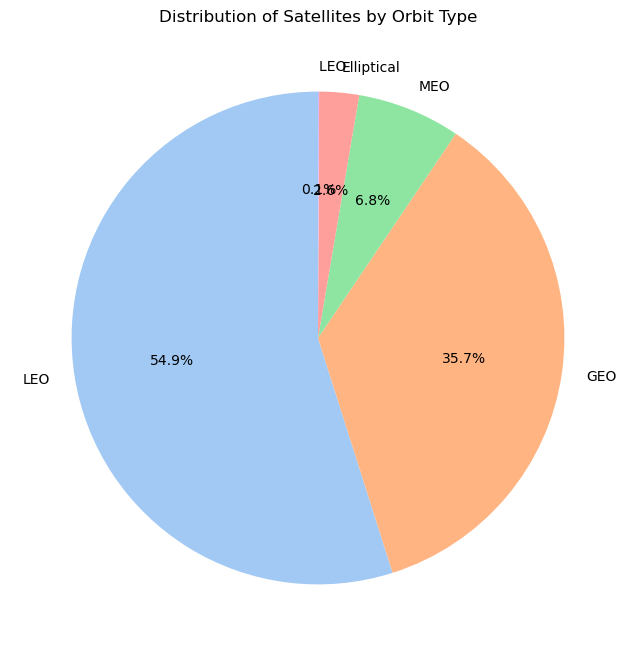

In [6]:
# Orbit Counts
orbit_counts = df['Class of Orbit'].value_counts()

plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')[0:len(orbit_counts)]

plt.pie(
    orbit_counts,
    labels=orbit_counts.index,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Distribution of Satellites by Orbit Type')
plt.show()

In [ ]:
# Purpose of Satellites in Space

purpose_counts = df['Purpose'].value_counts().head(10)
px.bar(
    purpose_counts,
    title="Top Satellite Purpose",
    labels={'value':'Count','Index':'Purpose'}
).show()

In [8]:
# Launches over time

df['Date of Launch'] = pd.to_datetime(df['Date of Launch'], errors='coerce')
launch_trend = df.groupby(df['Date of Launch'].dt.year).size()
px.line(
    launch_trend,
    title="Satellites Launched by Year",
    labels={'value':'Number of Satellites','index':'Year'}
)

In [9]:
# Cleaning columns names by removing spaces
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('/', '_')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Official_Name_of_Satellite                   1420 non-null   object        
 1   Country_Organization_of_UN_Registry          1420 non-null   object        
 2   Operator_Owner                               1419 non-null   object        
 3   Country_of_Operator_Owner                    1420 non-null   object        
 4   Users                                        1419 non-null   object        
 5   Purpose                                      1419 non-null   object        
 6   Detailed_Purpose                             369 non-null    object        
 7   Class_of_Orbit                               1419 non-null   object        
 8   Type_of_Orbit                                899 non-null    object        
 9

In [11]:
# Compare satellite purpose vs orbit class
cross = pd.crosstab(df['Class_of_Orbit'], df['Purpose'])
cross

Purpose,Communications,Communications/Maritime Tracking,Communications/Navigation,Communications/Technology Development,Earth Observation,Earth Observation/Communications,Earth Observation/Communications/Space Science,Earth Observation/Research,Earth Observation/Technology Development,Earth Science,Earth/Space Science,Navigation/Global Positioning,Navigation/Regional Positioning,Space Observation,Space Science,Technology Demonstration,Technology Development
Class_of_Orbit,,,,,,,,,,,,,,,,,
Elliptical,10,0,0,0,7,0,0,0,0,0,0,0,0,0,17,0,3
GEO,437,0,1,3,35,1,0,0,0,0,0,14,8,2,1,0,4
LEO,239,5,0,5,312,1,1,1,5,9,1,0,0,3,44,6,147
LEO,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
MEO,13,0,0,0,0,0,0,0,0,0,0,83,0,0,0,0,0


In [12]:
px.imshow(
    cross,
    color_continuous_scale='Blues',
    title='Purpose vs Orbit Class (Heatmap)'
)

In [13]:
# Orbit class vs Launch Mass

fig = px.box(
    df,
    x='Class_of_Orbit',
    y='Launch_Mass_(Kilograms)',
    title='Satellite Mass Distribution by Orbit Class',
    points='all'
)

fig.write_image(r"C:\Users\Admin\Documents\global_space_data\outputs\charts\satellite_mass_distribution_by_orbit.png")

fig.show()

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [ ]:
 # Trend by Orbit
trend = (
    df.groupby([df['Date_of_Launch'].dt.year, 'Class_of_Orbit'])
    .size()
    .reset_index(name='Count')
)

px.line(
    trend,
    x='Date_of_Launch',
    y='Count',
    color='Class_of_Orbit',
    title='Satellite Launch Trend by Orbit Class'
)

In [ ]:
# Countries Vs. Orbit

trend = (
    df.groupby([df['Date_of_Launch'].dt.year, 'Class_of_Orbit'])
    .size()
    .reset_index(name='Count')
)

px.line(
    trend,
    x='Date_of_Launch',
    y='Count',
    color='Class_of_Orbit',
    title='Satellite Launch Trend by Orbit Class'
)


In [ ]:
 1. Create folder path if not exist
output_folder = r"C:\Users\Admin\Documents\global-space-analytics\outputs\maps"
os.makedirs(output_folder, exist_ok=True)

# 2. Create base world map centered on the equator
m = folium.Map(location=[0, 0], zoom_start=2, tiles='CartoDB positron')

# 3. Define colors for orbit classes
orbit_colors = {
    'LEO': 'blue',    # Low Earth Orbit
    'MEO': 'green',   # Medium Earth Orbit
    'GEO': 'red',     # Geostationary Orbit
    'HEO': 'orange'   # Highly Elliptical Orbit
}

# 4. Symbolically add satellites based on orbit class
for _, row in df.dropna(subset=['Class_of_Orbit']).head(300).iterrows():
    color = orbit_colors.get(row['Class_of_Orbit'], 'gray')
    folium.CircleMarker(
        location=[0, 0],  # symbolic placement (not real coordinates)
        radius=2,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        tooltip=f"{row['Official_Name_of_Satellite']} ({row['Class_of_Orbit']})"
    ).add_to(m)

# 5. Save map to HTML
output_path = os.path.join(output_folder, "satellite_orbits_map.html")
m.save(output_path)

# 6. Automatically open the map in your browser
webbrowser.open(output_path)

print(f" Map saved successfully at: {output_path}")